In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, utils
from tensorflow.keras.datasets import cifar10
from tensorflow import keras

In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]

(x_train_full, y_train_full) , (x_test, y_test) = cifar10.load_data()

x_train, x_val , y_train, y_val = train_test_split(x_train_full, y_train_full, test_size = 0.2, shuffle =True, random_state =100)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 5s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [3]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-4-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


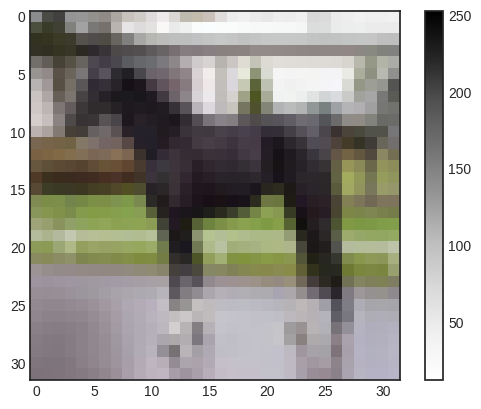

In [4]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [5]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]

x_train = x_train.reshape(-1 , 32*32*3)
x_val = x_val.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)


(40000, 3072)
(10000, 3072)
(10000, 3072)


In [7]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [8]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]

model = keras.Sequential()
model.add(layers.Input(shape = (3072, )))
model.add(layers.Dense(2048, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024,activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation = 'softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_1 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0

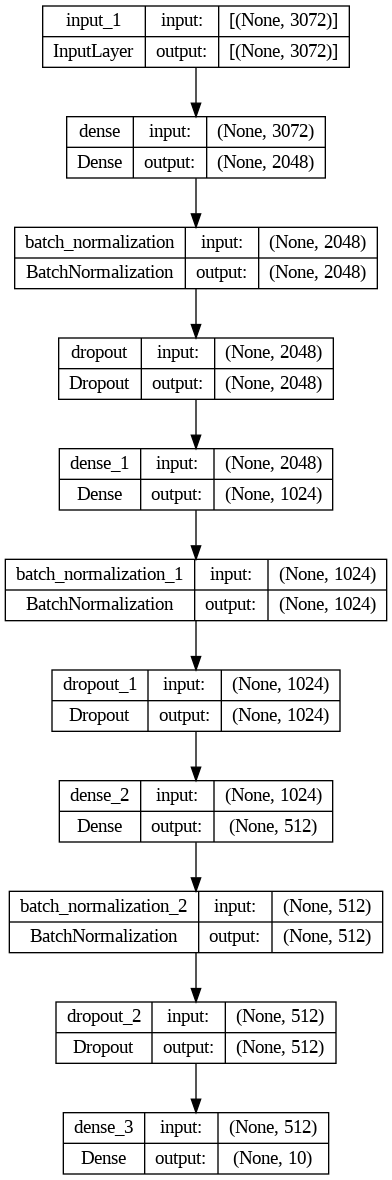

In [10]:
utils.plot_model(model, show_shapes=True)

In [11]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]

from keras import callbacks

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

check_point_cb = callbacks.ModelCheckpoint('keras_CIFAR10.h5',
                                           save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
1242/1250 [============================>.] - ETA: 0s - loss: 1.9889 - accuracy: 0.3162

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 18s 8ms/step - loss: 1.9880 - accuracy: 0.3165 - val_loss: 1.7518 - val_accuracy: 0.3878
Epoch 2/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7503 - accuracy: 0.3793 - val_loss: 1.6636 - val_accuracy: 0.4012
Epoch 3/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6607 - accuracy: 0.4083 - val_loss: 1.6448 - val_accuracy: 0.4230
Epoch 4/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6053 - accuracy: 0.4262 - val_loss: 1.6287 - val_accuracy: 0.4319
Epoch 5/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5749 - accuracy: 0.4374 - val_loss: 1.7405 - val_accuracy: 0.4029
Epoch 6/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5595 - accuracy: 0.4446 - val_loss: 1.6572 - val_accuracy: 0.4303
Epoch 7/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5273 - accuracy: 0.4543 - val_loss: 1.6068 - val_accuracy: 0

<ipython-input-12-7ff222b25dec>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


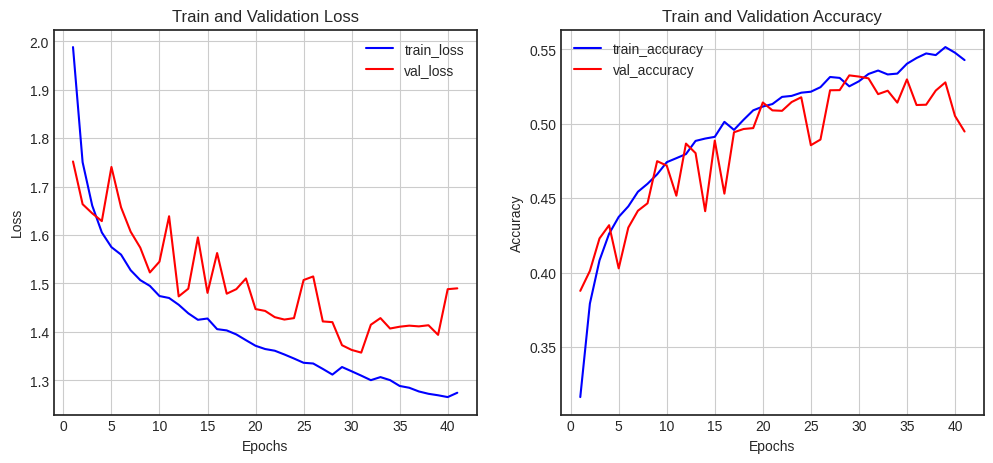

In [12]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss =history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (12,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, '-b', label = 'train_loss')
ax1.plot(epochs, val_loss, 'r-', label = 'val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [13]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.3130 - accuracy: 0.5314


[1.3129647970199585, 0.5314000248908997]

---
# 일기
2023-12-05(화) 날씨 맑았음

편도 너무 아프다.

분명 괜찮았는데, 온몸이 칼로 베이는 느낌이다.

편도만 아프면 문제가 아닌데, 전신이 아프다. 독감인가..

부서지는거 같아

괜찮다고 했는데, 괜찮지 않아.

빨리 쉬러 가야겠다.